# Reconstruct endomterium

This notebook is for...
using this data...

the aim is...
it contains....


In [2]:
import os
import novosparc
import scanpy as sc
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

## the data
downloaded here:
placed here on murphy:

In [3]:
# dirname = '/mnt/ramdisk'
dirname = '/dev/shm/ramdisk/'
fname = os.path.join(dirname,'uterus_histo.h5ad')

In [4]:
# read data
adata = sc.read(fname)

In [5]:
adata.obs

,SampleID,log2p1_count,percent_mito,n_genes,DonorID,BiopsyType,Location,Binary Stage,Stage,Broad cell type,Cell type,CellCycle Phase
4861STDY7387181_AAACCTGAGGCATGGT,4861STDY7387181,13.951467,0.057320,3842,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,S
4861STDY7387181_AAACCTGAGGGCACTA,4861STDY7387181,13.776227,0.043838,3544,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
4861STDY7387181_AAACCTGAGTGAAGTT,4861STDY7387181,12.894628,0.070791,2507,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Supporting,PV STEAP4,G1
4861STDY7387181_AAACCTGAGTGGGCTA,4861STDY7387181,12.329235,0.071137,1928,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,dS,G1
4861STDY7387181_AAACCTGCACCGAAAG,4861STDY7387181,12.171176,0.063977,1824,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
4861STDY7771123_TTTGTCATCCACGCAG,4861STDY7771123,10.534303,0.027665,700,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Supporting,PV STEAP4,G1
4861STDY7771123_TTTGTCATCCACTCCA,4861STDY7771123,10.245553,0.065952,635,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Supporting,PV STEAP4,G1
4861STDY7771123_TTTGTCATCCCATTAT,4861STDY7771123,10.759888,0.052510,855,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Supporting,uSMC,G1
4861STDY7771123_TTTGTCATCGGTCTAA,4861STDY7771123,10.208235,0.016920,580,A30,Organ_Donor,endometrium_enriched,Secretory,early-secretory,Stromal,dS,G1


In [6]:
# get broad cell type
col_ct_broad = "Broad cell type"
# get cell types
col_ct = "Cell type"
genenames = list(adata.var.index)
#genenames[1:5]
ngenes = len(genenames)
types = list(adata.obs[col_ct].unique())
num_cells, num_genes = adata.shape

print('number of cells: %d' % num_cells)
print('Number of genes: %d' % ngenes)
print('Number of cells per cell-type:')
print(adata.obs[col_ct].value_counts())
print()
print('NUmber of cells per cell-type, broad tissue:')
print(adata.obs.groupby([col_ct, col_ct_broad]).size().unstack())

number of cells: 35423
Number of genes: 28614
Number of cells per cell-type:
eS                    9178
uSMC                  7511
Endothelial ACKR1     5494
PV MYH11              3390
dS                    2459
PV STEAP4             2202
Other                 1524
Glandular             1113
Fibroblast C7          869
SOX9                   435
Lymphoid               365
Myeloid                298
Endothelial SEMA3G     277
Ciliated               276
Lumenal                 32
Name: Cell type, dtype: int64

NUmber of cells per cell-type, broad tissue:
Broad cell type     Epithelial  Endothelial  Immune  Supporting  Stromal  \
Cell type                                                                  
SOX9                       435            0       0           0        0   
Lumenal                     32            0       0           0        0   
Glandular                 1113            0       0           0        0   
Ciliated                   276            0       0           

In [7]:
# filtering excluded cells
included = ~(adata.obs[col_ct] == 'Excluded')
adata = adata[included]

In [8]:
# optional: subset cells
num_cells = 10
sc.pp.subsample(adata, n_obs=num_cells)

### (Optional) Generate low dimensional representation of the data
To reduce the noise, capture meaningful expression distances between cells and reduce runtimes, it is advisable to decrease the dimension of gene expression. This can be done, for example, by either subsetting the gene expression matrix for highly variable genes or using PCA representation.

In [9]:
dge_rep = None # a representation of cells gene expression
sc.pp.highly_variable_genes(adata)
is_var_gene = adata.var['highly_variable']
var_genes = list(is_var_gene.index[is_var_gene])

# alternative 1: variable expressed genes representation
dge_rep = adata.to_df()[var_genes]
dge_rep

,SAMD11,HES4,TNFRSF4,PIK3CD-AS2,RBP7,SRM,HSPB7,NBL1,PINK1,HP1BP3,...,FBLN1,CTA-29F11.1,CXADR,IFNAR2,MRPS6,SLC5A3,BACE2,NDUFV3,PTTG1IP,COL18A1
4861STDY7771123_GCAAACTCAGACGCTC,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.584962,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4861STDY7771115_GTGGGTCTCATGTAGC,0.0,2.0,0.000000,0.000000,0.000000,1.584962,0.0,1.000000,0.000000,1.584962,...,1.584962,1.584962,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,2.807355
4861STDY7771123_GGCGTGTAGTGTTTGC,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,1.000000,0.000000
4861STDY7387183_AGGCCGTTCGAATGGG,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.0,0.000000,1.584962,0.000000,...,0.000000,0.000000,1.584962,0.000000,0.000000,0.0,2.0,0.000000,1.584962,0.000000
4861STDY7771123_CCACCTATCACTTACT,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.584962,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000
4861STDY7771115_AATCCAGAGCTAACTC,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4861STDY7387181_CTGTTTAGTGAACCTT,1.0,0.0,1.584962,0.000000,1.584962,0.000000,1.0,1.000000,1.584962,0.000000,...,1.584962,0.000000,0.000000,0.000000,3.169925,1.0,0.0,0.000000,0.000000,1.000000
4861STDY7387182_CGCTATCCAGTCAGCC,2.0,0.0,0.000000,1.584962,2.584963,1.584962,0.0,2.584963,0.000000,2.321928,...,4.392318,1.584962,0.000000,0.000000,2.321928,2.0,0.0,1.584962,2.000000,0.000000
4861STDY7771123_CGGACTGGTTGTACAC,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4861STDY7387182_CGTTGGGCAAGCTGTT,1.0,1.0,0.000000,0.000000,1.584962,0.000000,0.0,2.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,1.584962,1.584962,1.0,0.0,0.000000,0.000000,0.000000


In [10]:
# alternative 2: pca representation
# sc.pp.pca(adata)
# dge_rep = pd.DataFrame(adata.obsm['X_pca'])
# dge_rep
# sc.pl.pca_variance_ratio(adata, log=True)

In [11]:
# make a umap just to see how it looks like
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=24)
sc.tl.umap(adata)
sc.pl.umap(adata, color="Cell type")

         Falling back to preprocessing with `sc.pp.pca` and default params.


ValueError: `X_pca` does not have enough PCs. Rerun `sc.pp.pca` with adjusted `n_comps`.

## Create a target space
### no prior knowledge of target space

novoSpaRc can create a target space by setting locations on certain basic shapes. Current supported shapes include filled circle, 2D torus projection, rectangular grid, sphere and torus. Grids can be populated with equidistant or randomly drawn points.

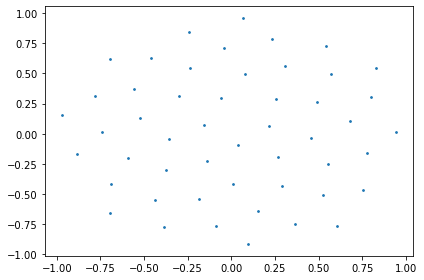

In [16]:
num_locations = 50 # where does this come from?


locations_circle = novosparc.gm.construct_circle(num_locations=num_locations)

tit_size = 15
dpi = 100
fig = plt.scatter(locations_circle[:, 0], locations_circle[:, 1], s=3)
plt.tight_layout()
plt.show()

## Reconstruct the tissue de novo
### Construct Tissue object
So far, we constructed the input for the spatial reconstruction. Thus we next initialise a tissue object with the cell expression dataset and target space locations.

In [17]:
# construct tissue object
tissue = novosparc.cm.Tissue(dataset=adata, locations=locations_circle)

### Compute cost matrices
The OT framework interpolates between two assumptions, structural correspondence assumption and atlas assumption.

With the de novo reconstruction we only need the structural correspondence assumption. For the structural correspondence (smooth) assumption we set the cells and locations the number of neighbors to use for constructing the k-Nearest Neighbors graph.

In [18]:
num_neighbors_s = num_neighbors_t = 2

# since we don't have the atlas assumption, we can also setup only the smooth costs.
tissue.setup_smooth_costs(dge_rep=dge_rep, num_neighbors_s=num_neighbors_s, num_neighbors_t=num_neighbors_t)

Setting up for reconstruction ... done ( 0.01 seconds )


In [19]:
tissue.reconstruct(alpha_linear=0, epsilon=5e-3)

Reconstructing spatial information with 0 markers: 10 cells and 50 locations ... 
Trying with epsilon: 5.00e-03


In [20]:
type(tissue.dge)

numpy.ndarray

### Compute OT of cells to locations with a given alpha parameter

Now we can reconstruct our tissue. The `alpha_linear` parameter controls the contribution of the two branches in `novoSpaRc`: `alpha_linear=0` means that no prior information is available, while `alpha_linear=1` implies that the reconstruction will be only based on the reference marker genes provided. Here we aim for a de novo reconstruction.

In addition to setting alpha_linear, epsilon, the coefficient of the entropy can also be set. A low epsilon will result in a more definitive mapping and a higher epsilon with a more continuous one. Choosing a low epsilon often leads to numerical errors. Therefore, if this is the case, we attempt reconstruction with a greater epsilon.

### Validate predicted expression over target space
Expression over the locations is computed and saved in tissue.sdge. This provides a genes x locations matrix describing the expression over the target space locations.

**Marker genes for endometrial tissue**
(source: [Garcia-Alonso et.al, Figure 2](https://www.nature.com/articles/s41588-021-00972-2/figures/2) )

epithelial marker : WNT7A, LGR5
lumenal cells:  KRT5, COX1
glandular cells: SCGB2A2

In [21]:
# reconstructed expression of individual genes
pl_genes = ['WNT7A', 'LGR5', 'KRT5','COX1','SCGB2A2']
sdge = tissue.sdge

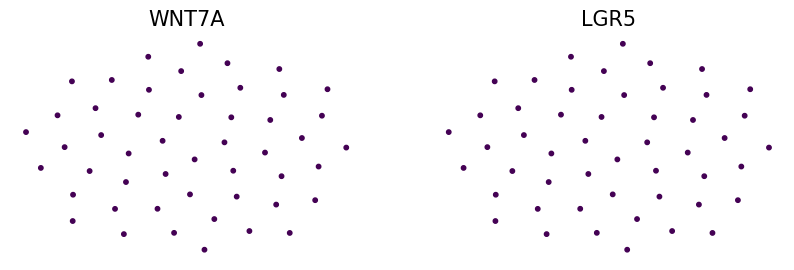

<Figure size 432x288 with 0 Axes>

In [23]:
dataset_reconst = sc.AnnData(pd.DataFrame(sdge.T, columns=genenames))
dataset_reconst.obsm['spatial'] = locations_circle

novosparc.pl.embedding(dataset_reconst, pl_genes)

In [ ]:
genenames